# 2. Preprocessing and EDA

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
## loading the dataset
import joblib
df = joblib.load("artifacts/cleaned_data.pkl")

In [72]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [73]:
# Changing some columns names for better understanding
df=df.rename(columns={'listed_in(type)':'type','listed_in(city)':'city'})


In [74]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [75]:
# description of the dataset
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          51717 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         51717 non-null  object
 8   location      51717 non-null  object
 9   rest_type     51717 non-null  object
 10  dish_liked    51717 non-null  object
 11  cuisines      51717 non-null  object
 12  approx_cost   51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  type          51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


#### Dropping Columns that are not required for our analysis
- phone
- dish_liked
- address
- menu_item
- city
- url

In [77]:
# df.drop(['url','phone','dish_liked','address','menu_item',"city"],axis=1, inplace=True)

In [78]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [79]:
# df.dropna()

In [80]:
## appprox_cost missing value imputation with the mean value
df.shape
df['approx_cost'].unique()
df['approx_cost'].nunique()
df['approx_cost'].dtype

dtype('O')

In [81]:
## changing the datatype of approx_cost to float
df['approx_cost'] = df['approx_cost'].astype(str)
df['approx_cost'] = df['approx_cost'].apply(lambda x: x.replace(',','.'))
df['approx_cost'] = df['approx_cost'].astype(float)

now, imputatio with the mean would be easy

In [82]:
## appprox_cost missing value imputation with the mean value
approx_cost_mean = df['approx_cost'].mean()
approx_cost_mean

# filling na with mean value
df['approx_cost'] = df['approx_cost'].fillna(approx_cost_mean)
df['approx_cost'] = df['approx_cost'].astype(int)

### Auto saving visualization inside folder->
from utils.py

In [114]:
from utils import save_plot, setup_autosave
setup_autosave()

✅ Auto-save mode activated. Use plt.show('filename') to save automatically.


✅ Auto-saved: visualizations/approx_cost_distribution.png.png


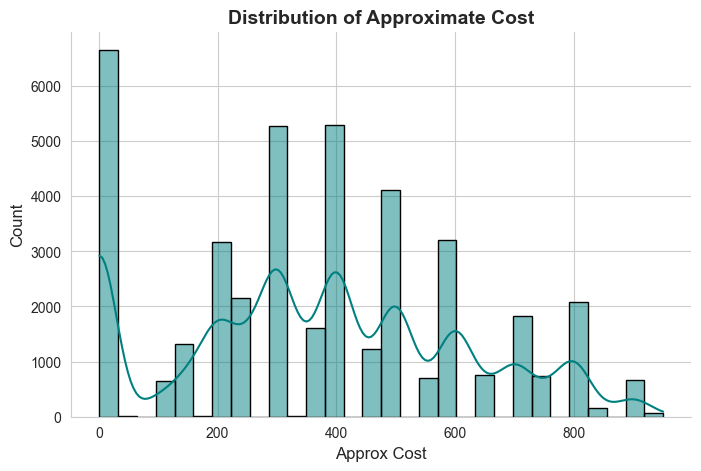

In [118]:
plt.figure(figsize=(8,5))
sns.histplot(df['approx_cost'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title("Distribution of Approximate Cost", fontsize=14, fontweight='bold')
plt.xlabel("Approx Cost", fontsize=12)
plt.ylabel("Count", fontsize=12)
sns.despine()  # Remove top and right spines for a cleaner look (chatGPT suggestion) 
plt.show('approx_cost_distribution.png')

In [84]:
## Checking for missing values
df['approx_cost'].isnull().sum()
df[df['approx_cost']==''].shape[0] # done

0

In [85]:
## checking for any other missing values in the dataset
df.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
approx_cost     0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [86]:
## checkin for blank values in the dataset
for column in df.columns:
    print(f"{column} : {df[df[column]==''].shape[0]}")

url : 0
address : 0
name : 0
online_order : 0
book_table : 0
rate : 7844
votes : 0
phone : 1208
location : 21
rest_type : 227
dish_liked : 28078
cuisines : 45
approx_cost : 0
reviews_list : 0
menu_item : 0
type : 0
city : 0


In [87]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [88]:
## handling "rate" column
df['rate'].unique()
df = df[df['rate'] != 'NEW']
df = df[df['rate'] != ""].reset_index(drop=True)
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [89]:
## also need to remove the "/5" from the rate column values
def remove_slash(data, column):
    removed = lambda x: x.replace('/5', '') if type(x) == str else x
    data[column] = data[column].apply(removed).astype(float)
    return data

In [90]:
## removing the /5 from rate column using the function
df = remove_slash(df, 'rate')
df['rate'].head() 
## Checking the rate column values after removing /5
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

✅ Auto-saved: visualizations/restaurant_ratings_distribution.png.png


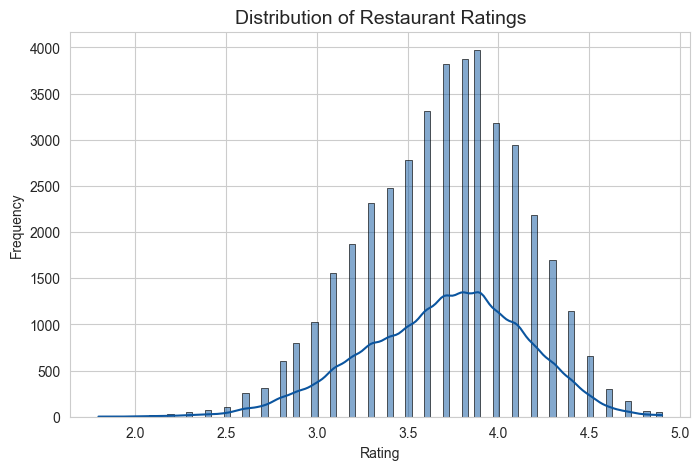

In [119]:
plt.figure(figsize=(8,5))
sns.histplot(df['rate'], kde=True, edgecolor='black')
plt.title("Distribution of Restaurant Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show("restaurant_ratings_distribution.png")

In [128]:
# checking skewness in the rate column
print('skewness->',df.rate.skew()) 
# checking blank values in rate column
df[df['rate']==""].shape[0]
df['rate'].unique()

skewness-> -0.3286007981782886


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### Note-> we still have "Blank values" in the dataset that we have replaced for NaN

In [129]:
## checkin for blank values in the dataset
for column in df.columns:
    print(f"{column} : {df[df[column]==''].shape[0]}")

url : 0
address : 0
name : 0
online_order : 0
book_table : 0
rate : 0
votes : 0
phone : 814
location : 0
rest_type : 149
dish_liked : 18203
cuisines : 11
approx_cost : 0
reviews_list : 0
menu_item : 0
type : 0
city : 0


In [97]:
histo = df.groupby('name')['address'].count()
# Lets take the top 50 restaurantsand plot bar graph
histo = histo.sort_values()[-30:]

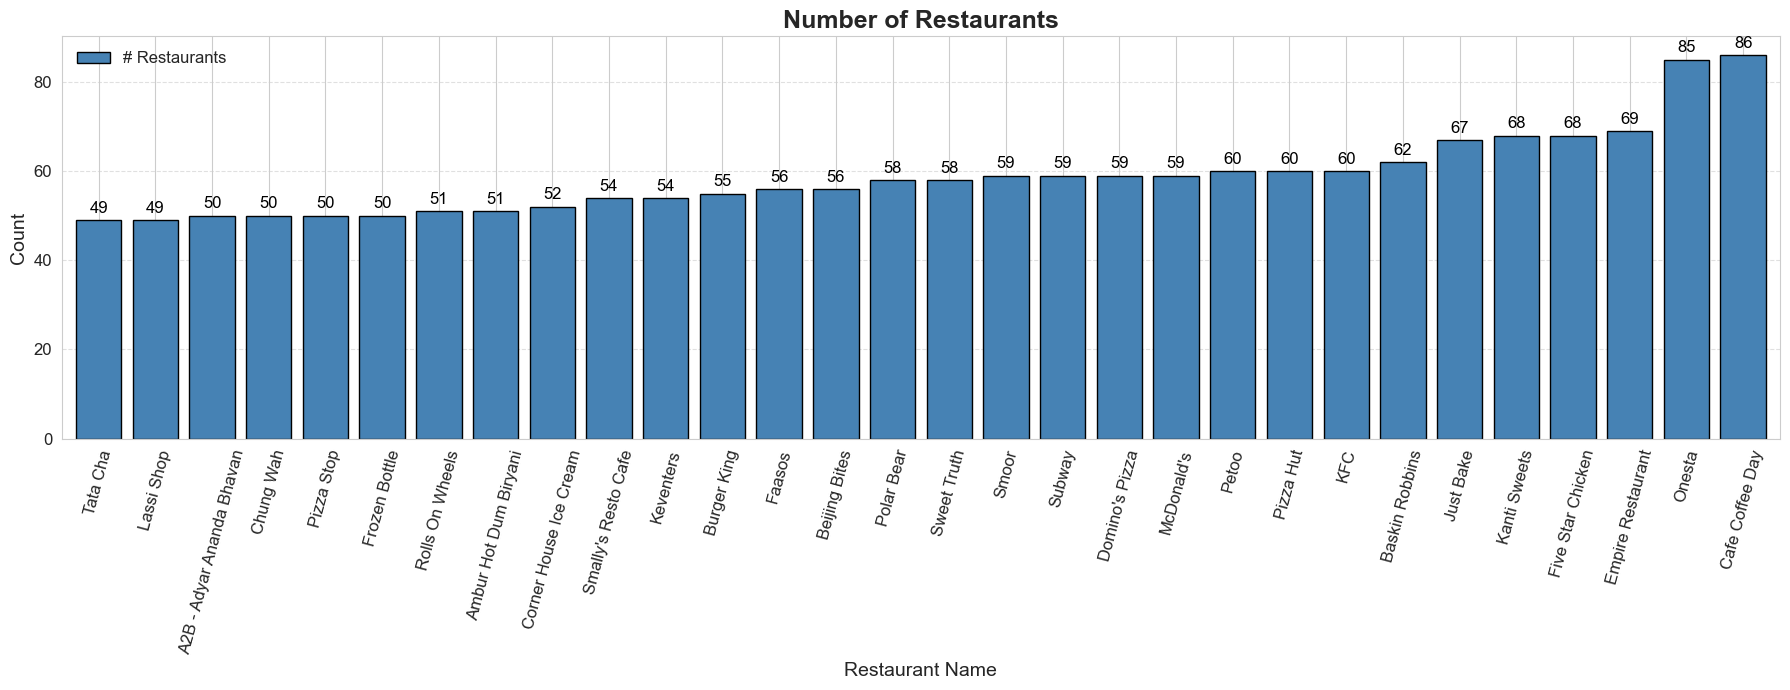

In [101]:
# Simple, beautiful, and professional bar plot
# used ChatGPT to beautify the plot->
ax = histo.plot(
    kind='bar',
    figsize=(18, 7),
    rot=75,
    width=0.8,
    color='steelblue',
    edgecolor='black'
)

# Add value labels on bars
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 1,
        f'{int(rect.get_height())}',
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Beautify the chart
ax.set_title('Number of Restaurants', fontsize=18, fontweight='bold')
ax.set_xlabel('Restaurant Name', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_facecolor('white')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Simplified legend
ax.legend(['# Restaurants'], fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


- "Cafe Coffee Day" has literally 86 restaurants in Bengaluru!

### Word Cloud 

✅ Auto-saved: visualizations/Most Frequent Restaurant Names.png.png


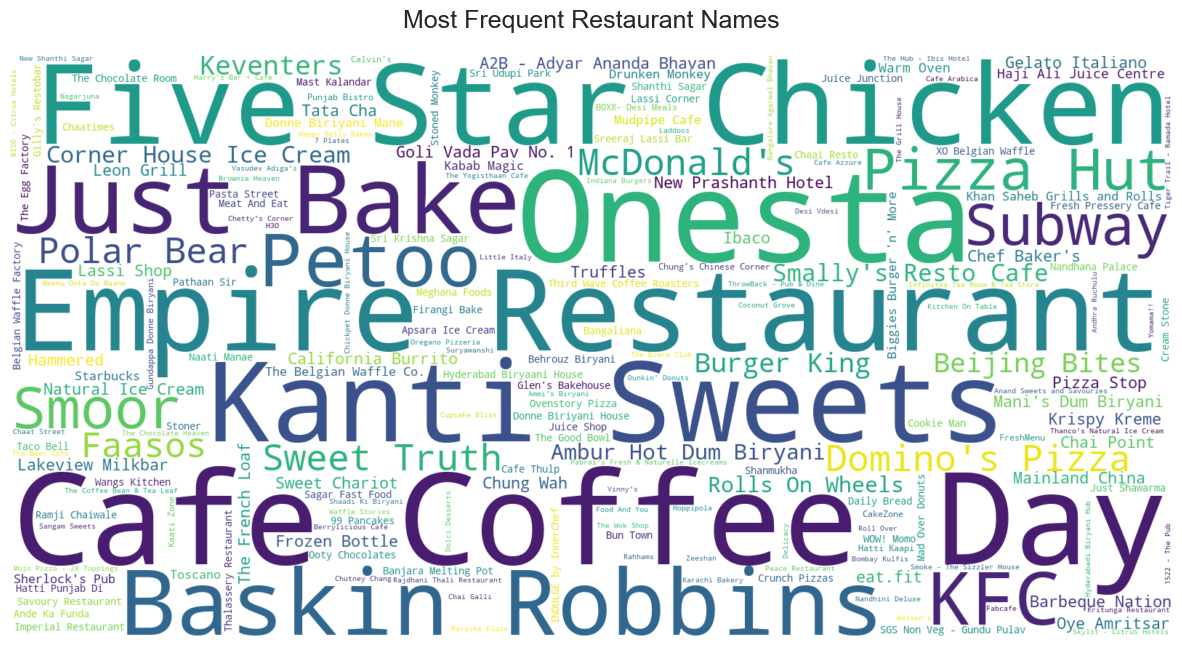

In [137]:
from wordcloud import WordCloud
## used ChatGPT to beautify the wordcloud plot->
# Generate word cloud from restaurant names
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=200,
    relative_scaling=0.5
).generate_from_frequencies(df['name'].value_counts())

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Restaurant Names", fontsize=18, pad=20)
plt.show("Most Frequent Restaurant Names.png")
